In [ ]:
!pip install jupyter-dash

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')
senti_data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_json('/content/drive/MyDrive/user_bot_data/help.json')


In [ ]:
import pandas as pd   #data summary

# Load your data into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')


# Display basic information about the data
print("Data Information:")
print(data.info())

# View the first few rows of the data
print("\nFirst Few Rows:")
print(data.head())

# View the last few rows of the data
print("\nLast Few Rows:")
print(data.tail())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     3361 non-null   object
 1   chatbot  3361 non-null   object
dtypes: object(2)
memory usage: 52.6+ KB
None

First Few Rows:
                                                user  \
0  I'm so frustrated with my job. I can't stand m...   
1  I had a huge argument with my roommate. I can'...   
2  My partner and I had a heated argument last ni...   
3  I got a low grade on my exam, and I'm furious ...   
4  I'm angry about the current political situatio...   

                                             chatbot  
0  Work frustrations can be tough. Let's talk abo...  
1  Roommate conflicts happen. Let's discuss confl...  
2  Relationship conflicts can be challenging. Let...  
3  Academic setbacks can be frustrating. Let's ex...  
4  Political frustrations are common. Let's discu... 

In [ ]:
import pandas as pd  #data cleaning

# Load your data into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Check for missing values in the dataset
missing_values = data.isna().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Handle missing values
# Replace NaN values in the 'user' and 'chatbot' columns with a placeholder text like "No data available"
data['user'].fillna("No data available", inplace=True)
data['chatbot'].fillna("No data available", inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = data.isna().sum()
print("\nMissing Values After Handling:")
print(missing_values_after_handling)


Missing Values:
user       0
chatbot    0
dtype: int64

Missing Values After Handling:
user       0
chatbot    0
dtype: int64


In [ ]:
import pandas as pd  #data cleaning

# Load your data into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')

# Check for missing values in the dataset
missing_values = data.isna().sum()  #checks for missing values in the dataset

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Handle missing values
# Replace NaN values in the 'user' and 'chatbot' columns with a placeholder text like "No data available"
data['user'].fillna("No data available", inplace=True)  #code replaces NaN values in the 'user' and 'chatbot' columns with a placeholder text
data['chatbot'].fillna("No data available", inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = data.isna().sum()
print("\nMissing Values After Handling:")
print(missing_values_after_handling)


Missing Values:
text               72
label               0
topic               0
response_type       0
user             2540
chatbot          2540
dtype: int64

Missing Values After Handling:
text             72
label             0
topic             0
response_type     0
user              0
chatbot           0
dtype: int64


In [ ]:
# Calculate basic statistics for numerical columns
numerical_stats = data.describe()
print("Numerical Data Statistics:")  #to compute various statistics, including measures of central tendency and dispersion
print(numerical_stats)   #output includes statistics such as count, mean, standard deviation, minimum, and various percentiles (25%, 50%, and 75%).


Numerical Data Statistics:
                                                     text  label       topic  \
count                                                2540   2612        2612   
unique                                               2373     22        1517   
top     I feel guilty for not donating to a charity wh...  Guilt  Friendship   
freq                                                    5    261          66   

       response_type               user            chatbot  
count           2612               2612               2612  
unique           832                 73                 73  
top             Envy  No data available  No data available  
freq             185               2540               2540  


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')#SentimentIntensityAnalyzer  from NLTK's vader module is imported
sid = SentimentIntensityAnalyzer()#analyzer is used to perform sentiment analysis on text data.

# Load the Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Applying sentiment analysis to the 'user' and 'chatbot' columns
#lambda function that calculates sentiment scores using sid.polarity_scores(text).
data['user_sentiment'] = data['user'].apply(lambda text: sid.polarity_scores(text)) #Sentiment analysis is applied to both the 'user'
data['chatbot_sentiment'] = data['chatbot'].apply(lambda text: sid.polarity_scores(text)) #and 'chatbot' columns using the VADER sentiment analyzer



# Print the first few rows with sentiment scores
print(data[['user', 'user_sentiment', 'chatbot', 'chatbot_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                user  \
0  I'm so frustrated with my job. I can't stand m...   
1  I had a huge argument with my roommate. I can'...   
2  My partner and I had a heated argument last ni...   
3  I got a low grade on my exam, and I'm furious ...   
4  I'm angry about the current political situatio...   

                                      user_sentiment  \
0  {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...   
1  {'neg': 0.35, 'neu': 0.47, 'pos': 0.18, 'compo...   
2  {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...   
3  {'neg': 0.392, 'neu': 0.608, 'pos': 0.0, 'comp...   
4  {'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...   

                                             chatbot  \
0  Work frustrations can be tough. Let's talk abo...   
1  Roommate conflicts happen. Let's discuss confl...   
2  Relationship conflicts can be challenging. Let...   
3  Academic setbacks can be frustrating. Let's ex...   
4  Political frustrations are common. Let's di

       user_message_length  chatbot_response_length
count          3361.000000              3361.000000
mean             88.178518               105.938114
std              17.689256                20.524674
min              34.000000                48.000000
25%              77.000000                90.000000
50%              87.000000               103.000000
75%              99.000000               119.000000
max             166.000000               215.000000


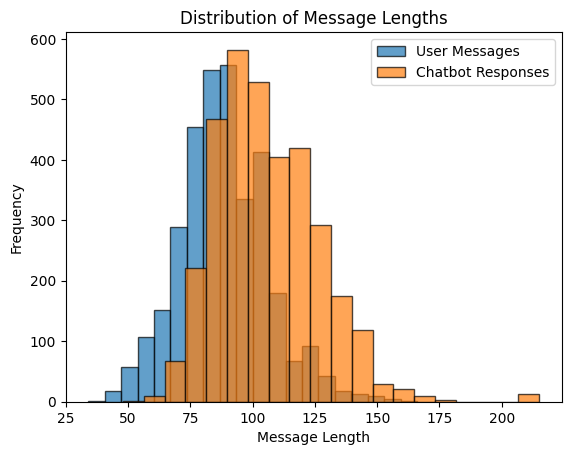

In [ ]:
import pandas as pd #data visualization histogram
import matplotlib.pyplot as plt   #data visualizations, including histograms

# Load the data
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Calculate the length of each user message
data['user_message_length'] = data['user'].apply(len)

# Calculate the length of each chatbot response
data['chatbot_response_length'] = data['chatbot'].apply(len)

# Basic data summary
summary = data.describe()
print(summary)

# Create histograms for user message length and chatbot response length
plt.hist(data['user_message_length'], bins=20, edgecolor='k', label='User Messages', alpha=0.7)
plt.hist(data['chatbot_response_length'], bins=20, edgecolor='k', label='Chatbot Responses', alpha=0.7)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.legend()
plt.show()






       user_message_length  chatbot_response_length
count          2540.000000              2540.000000
mean             87.937795                16.014567
std              19.893772                 7.322925
min              37.000000                 4.000000
25%              74.000000                10.000000
50%              84.000000                16.000000
75%             104.000000                20.000000
max             152.000000                48.000000


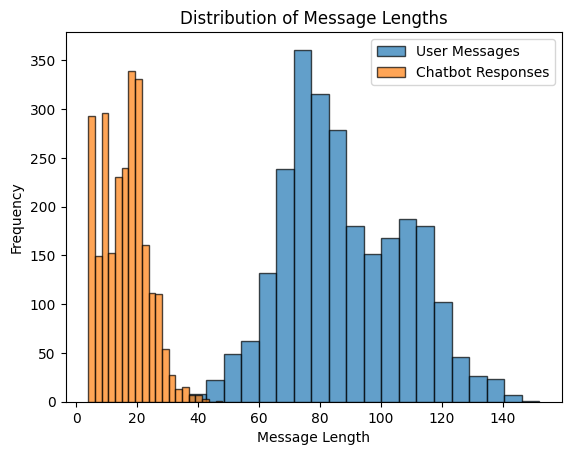

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  #Data Filtering,Calculate Message Lengths,

# Load the data
data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')

# Filter out rows where 'user' or 'chatbot' is not a string
data = data[data['text'].apply(lambda x: isinstance(x, str))]

# Calculate the length of each user message
data['user_message_length'] = data['text'].apply(len) #representing user messages

# Calculate the length of each chatbot response
data['chatbot_response_length'] = data['response_type'].apply(len)

# Basic data summary
summary = data.describe()
print(summary)

# Create histograms for user message length and chatbot response length
plt.hist(data['user_message_length'], bins=20, edgecolor='k', label='User Messages', alpha=0.7)
plt.hist(data['chatbot_response_length'], bins=20, edgecolor='k', label='Chatbot Responses', alpha=0.7)
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.legend()
plt.show()


Average User Message Length: 87.94 characters
Average Chatbot Response Length: 16.01 characters


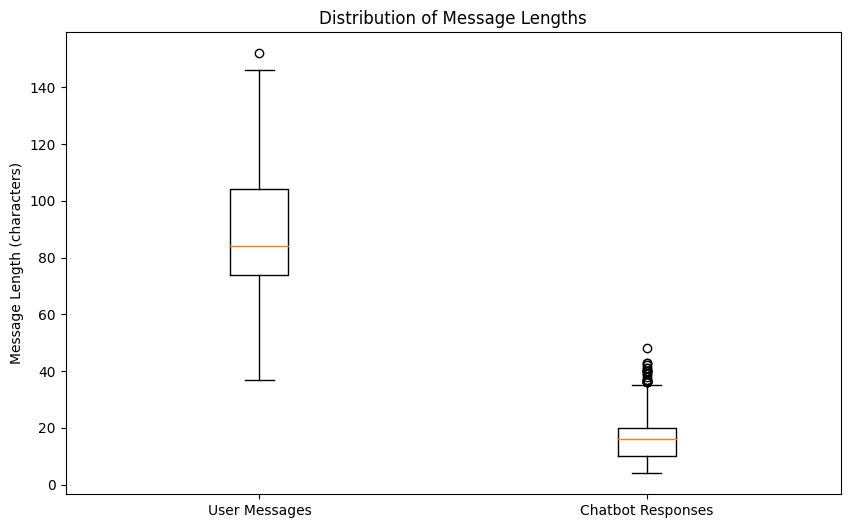

       user_message_length  chatbot_response_length
count          2540.000000              2540.000000
mean             87.937795                16.014567
std              19.893772                 7.322925
min              37.000000                 4.000000
25%              74.000000                10.000000
50%              84.000000                16.000000
75%             104.000000                20.000000
max             152.000000                48.000000


In [ ]:
# Calculate the average message length for users and chatbot responses

#calculating and visualizing average message lengths and using box plots for data analysis:
average_user_message_length = data['user_message_length'].mean()
average_chatbot_response_length = data['chatbot_response_length'].mean()

# Print the calculated average message lengths
print(f'Average User Message Length: {average_user_message_length:.2f} characters') #ensures that the values are displayed with two decimal places.
print(f'Average Chatbot Response Length: {average_chatbot_response_length:.2f} characters')

# Visualize the distribution of message lengths using box plots
plt.figure(figsize=(10, 6))
plt.boxplot([data['user_message_length'], data['chatbot_response_length']], labels=['User Messages', 'Chatbot Responses'])
plt.ylabel('Message Length (characters)')
plt.title('Distribution of Message Lengths')
plt.show()

# Analyze the descriptive statistics of message lengths
message_length_stats = data[['user_message_length', 'chatbot_response_length']].describe()
print(message_length_stats)


In [ ]:
# Check the column names in your DataFrame
column_names = data.columns
print(column_names)


In [ ]:

                #sentiment analysis using the VADER sentiment analyzer:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Load your data from the JSON file
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Initialize the sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Filter out rows where 'user' and 'chatbot' are not strings
data = data[data['user'].apply(lambda x: isinstance(x, str))]
data = data[data['chatbot'].apply(lambda x: isinstance(x, str))]

# Create a new column for sentiment scores
data['user_sentiment'] = data['user'].apply(lambda text: sid.polarity_scores(text))#calculates the sentiment polarity scores, including positive,
data['chatbot_sentiment'] = data['chatbot'].apply(lambda text: sid.polarity_scores(text))# negative, neutral, and compound scores for each text.

# Print the first few rows with sentiment scores
print(data[['user', 'user_sentiment', 'chatbot', 'chatbot_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                user  \
0  I'm so frustrated with my job. I can't stand m...   
1  I had a huge argument with my roommate. I can'...   
2  My partner and I had a heated argument last ni...   
3  I got a low grade on my exam, and I'm furious ...   
4  I'm angry about the current political situatio...   

                                      user_sentiment  \
0  {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...   
1  {'neg': 0.35, 'neu': 0.47, 'pos': 0.18, 'compo...   
2  {'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...   
3  {'neg': 0.392, 'neu': 0.608, 'pos': 0.0, 'comp...   
4  {'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...   

                                             chatbot  \
0  Work frustrations can be tough. Let's talk abo...   
1  Roommate conflicts happen. Let's discuss confl...   
2  Relationship conflicts can be challenging. Let...   
3  Academic setbacks can be frustrating. Let's ex...   
4  Political frustrations are common. Let's di

First few rows of the DataFrame:
                                                user  \
0  I'm so frustrated with my job. I can't stand m...   
1  I had a huge argument with my roommate. I can'...   
2  My partner and I had a heated argument last ni...   
3  I got a low grade on my exam, and I'm furious ...   
4  I'm angry about the current political situatio...   

                                             chatbot  
0  Work frustrations can be tough. Let's talk abo...  
1  Roommate conflicts happen. Let's discuss confl...  
2  Relationship conflicts can be challenging. Let...  
3  Academic setbacks can be frustrating. Let's ex...  
4  Political frustrations are common. Let's discu...  

Last few rows of the DataFrame:
                                                   user  \
3356  I discovered a hidden cavern with stunning cry...   
3357  I received an unexpected visit from a childhoo...   
3358  I spotted a rare species of orchid in a botani...   
3359  I was surprised with a se

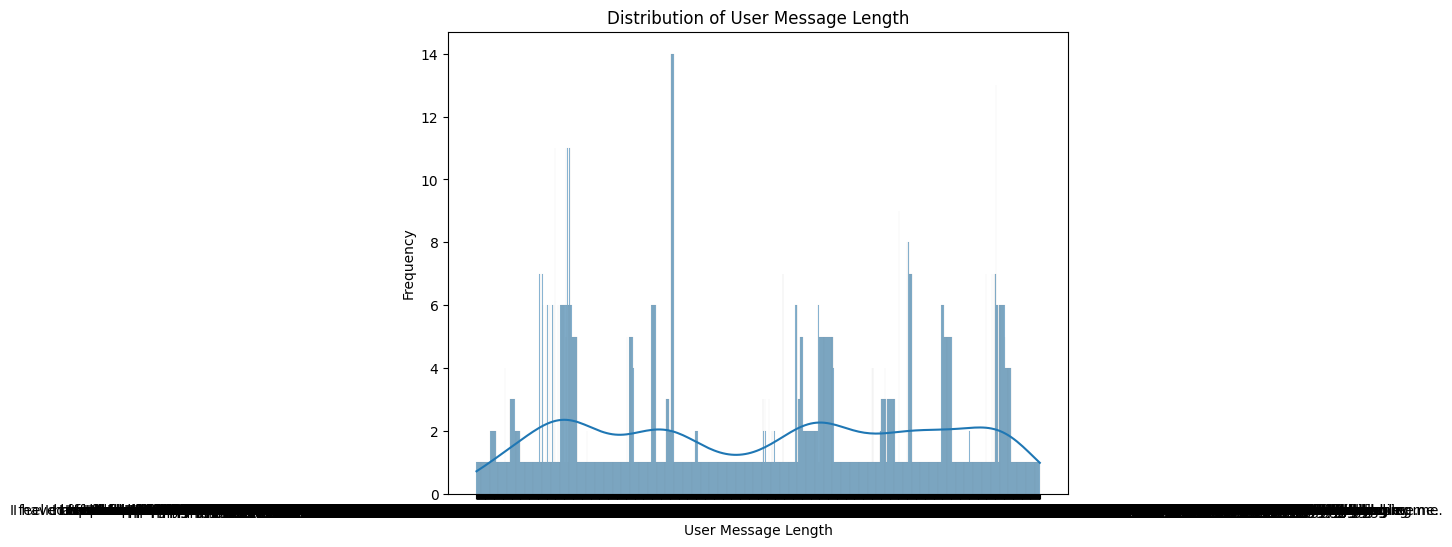

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data from a JSON file
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(data.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(data.tail())

# Check for missing values
print("\nMissing values in the DataFrame:")
print(data.isna().sum())

# Basic data summary
print("\nBasic data summary:")
print(data.describe())

#distribution of message lengths, allowing you to understand the range of message lengths and their frequency in your dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='user', kde=True)
plt.xlabel('User Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of User Message Length')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/sentemental_label_data/sentimental_emo.json')

# Find specific numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Print the names of numerical columns
print("Numerical Columns:")
print(numerical_columns.columns)


In [ ]:
import pandas as pd
import nltk
import string  # Import the 'string' module
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer models and 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')

# Load user-chatbot interaction data
interaction_data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Tokenize user messages
interaction_data['user_tokens'] = interaction_data['user'].apply(word_tokenize)

# Tokenize chatbot responses
interaction_data['chatbot_tokens'] = interaction_data['chatbot'].apply(word_tokenize)

# Load emotional and sentimental data
emotional_data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')

# Check and filter non-string data in the 'text' column
print("Before filtering:")
print(emotional_data.head())

emotional_data = emotional_data[emotional_data['text'].apply(lambda x: isinstance(x, str))]

# Tokenize text in emotional data
emotional_data['text_tokens'] = emotional_data['text'].apply(word_tokenize)

# Data Preprocessing Steps
# Lowercasing
emotional_data['text_tokens'] = emotional_data['text_tokens'].apply(lambda tokens: [token.lower() for token in tokens])

# Punctuation Removal
punctuation = string.punctuation
emotional_data['text_tokens'] = emotional_data['text_tokens'].apply(lambda tokens: [token for token in tokens if token not in punctuation])

# Stop Word Removal (optional)
stop_words = set(nltk.corpus.stopwords.words('english'))
emotional_data['text_tokens'] = emotional_data['text_tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])


# For reference, you can print the first few rows of each dataset with tokenized and preprocessed text:
print("After filtering, tokenization, and preprocessing:")
print("User-Chatbot Interaction Data:")
print(interaction_data[['user_tokens', 'chatbot_tokens']].head())

print("\nEmotional and Sentimental Data:")
print(emotional_data[['text_tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Before filtering:
                                                text  label          topic  \
0  I'm so frustrated with my job. I can't stand m...  Anger           Work   
1  I had a huge argument with my roommate. I can'...  Anger      Roommates   
2  My partner and I had a heated argument last ni...  Anger  Relationships   
3  I got a low grade on my exam, and I'm furious ...  Anger      Academics   
4  I'm angry about the current political situatio...  Anger       Politics   

          response_type user chatbot  
0   Supportive response  NaN     NaN  
1   Conflict resolution  NaN     NaN  
2   Conflict resolution  NaN     NaN  
3   Supportive response  NaN     NaN  
4  Informative response  NaN     NaN  
After filtering, tokenization, and preprocessing:
User-Chatbot Interaction Data:
                                         user_tokens  \
0  [I, 'm, so, frustrated, with, my, job, ., I, c...   
1  [I, had, a, huge, argument, with, my, roommate...   
2  [My, partner, and, I, had, 

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

#  Emotion and Sentiment Dataset into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')

# Remove rows with NaN values in the 'text' column
data = data.dropna(subset=['text'])

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores
data['sentiment_scores'] = data['text'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound sentiment score
data['compound_sentiment'] = data['sentiment_scores'].apply(lambda x: x['compound'])

# Print the first few rows with sentiment scores
print("\nSentiment Scores:")
print(data[['text', 'compound_sentiment']].head())



Sentiment Scores:
                                                text  compound_sentiment
0  I'm so frustrated with my job. I can't stand m...             -0.5709
1  I had a huge argument with my roommate. I can'...             -0.2874
2  My partner and I had a heated argument last ni...             -0.3612
3  I got a low grade on my exam, and I'm furious ...             -0.7003
4  I'm angry about the current political situatio...             -0.5106


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load your dataset into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/data.json')

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each row in your dataset
data['sentiment_polarity'] = data['user'].apply(get_sentiment_polarity)




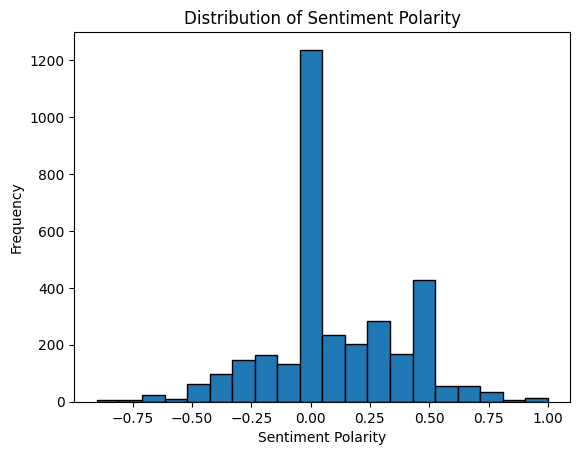

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of sentiment scores
plt.hist(data['sentiment_polarity'], bins=20, edgecolor='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()


In [ ]:
import string  #Text Preprocessing
import nltk
from nltk.tokenize import word_tokenize

# Sample text data
user_messages = data['user']

# Initialize the NLTK stopwords list
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

# Initialize empty lists to store preprocessed text
cleaned_user_messages = []

# Loop through user messages for preprocessing
for message in user_messages:
    # Lowercase the text
    message = message.lower()

    # Remove punctuation
    message = message.translate(str.maketrans('', '', string.punctuation))

    # Tokenization (optional)
    tokens = word_tokenize(message)

    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a clean message
    cleaned_message = ' '.join(filtered_tokens)

    cleaned_user_messages.append(cleaned_message)

# Replace the 'user' column with the cleaned text
data['user'] = cleaned_user_messages


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#======

In [ ]:

#used for various natural language processing tasks, such as topic modeling with Latent Dirichlet Allocation (LDA) or
# for creating numerical representations of text data for machine learning purposes
import pandas as pd
from gensim import corpora
from nltk.tokenize import word_tokenize

# Tokenize the 'user' column
data['user_tokens'] = data['user'].apply(word_tokenize)

# Create a dictionary from the tokenized user messages
dictionary = corpora.Dictionary(data['user_tokens']) #creates a dictionary from the tokenized user messages
                                                     #dictionary contains a mapping of words to unique numerical IDs

# Create a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in data['user_tokens']]


In [ ]:
# List the column names in your DataFrame
column_names = data.columns
print(column_names)


Index(['user', 'chatbot', 'sentiment_polarity', 'user_tokens'], dtype='object')


In [ ]:
from gensim import corpora, models #Advanced NLP Analysis
#genism ->advanced natural language processing (NLP) analysis.
# Assuming you have 'user_tokens' as tokenized user messages
dictionary = corpora.Dictionary(data['user_tokens']) #
corpus = [dictionary.doc2bow(tokens) for tokens in data['user_tokens']]

# Perform LDA ->Latent Dirichlet Allocation (LDA)
#  corpus: The bag-of-words corpus of tokenized user messages.
#  num_topics: The number of topics to discover in the data (in this case, 5 topics).
## id2word: The dictionary mapping word IDs to words.
#  passes: The number of passes through the entire corpus for training
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)

for topic in topics:
   print(topic)


(0, '0.035*"want" + 0.030*"im" + 0.023*"friend" + 0.016*"feel" + 0.014*"compassion"')
(1, '0.080*"im" + 0.018*"guilt" + 0.016*"cant" + 0.014*"believe" + 0.014*"calmly"')
(2, '0.035*"im" + 0.032*"consuming" + 0.030*"find" + 0.026*"regret" + 0.021*"calmness"')
(3, '0.067*"im" + 0.057*"regret" + 0.026*"overwhelming" + 0.025*"wish" + 0.023*"hadnt"')
(4, '0.095*"shame" + 0.089*"unbearable" + 0.038*"feel" + 0.024*"ashamed" + 0.017*"helping"')


In [ ]:
#used to evaluate the sentiment polarity of chatbot responses using the TextBlob library.

from textblob import TextBlob #Chatbot Response Evaluation

#  'chatbot_responses' as a list of chatbot responses
chatbot_responses = data['chatbot']

# Function to get sentiment polarity
def get_sentiment_polarity(text):  #takes a text input as a parameter and uses TextBlob to analyze the sentiment polarity of the text.
    analysis = TextBlob(text)       #to analyze the sentiment polarity of the text.
    return analysis.sentiment.polarity

# Apply sentiment analysis to each chatbot response
data['chatbot_sentiment_polarity'] = [get_sentiment_polarity(response) for response in chatbot_responses]

print(data['chatbot_sentiment_polarity'])



0      -0.388889
1       0.600000
2       0.500000
3      -0.200000
4      -0.150000
          ...   
3356    0.508333
3357    0.100000
3358    0.366667
3359    0.050000
3360    0.066667
Name: chatbot_sentiment_polarity, Length: 3361, dtype: float64


In [ ]:
import pandas as pd


data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')


features = data['text']  # Text messages
labels = data['label']  # Sentiment labels (i.e positive, negative, neutral)

# Verify the data by printing the first few rows
print("Sample User Messages:")
print(features.head())

print("\nSample Sentiment Labels:")
print(labels.head())


Sample User Messages:
0    I'm so frustrated with my job. I can't stand m...
1    I had a huge argument with my roommate. I can'...
2    My partner and I had a heated argument last ni...
3    I got a low grade on my exam, and I'm furious ...
4    I'm angry about the current political situatio...
Name: text, dtype: object

Sample Sentiment Labels:
0    Anger
1    Anger
2    Anger
3    Anger
4    Anger
Name: label, dtype: object


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2540 non-null   object
 1   label          2612 non-null   object
 2   topic          2612 non-null   object
 3   response_type  2612 non-null   object
 4   user           72 non-null     object
 5   chatbot        72 non-null     object
dtypes: object(6)
memory usage: 122.6+ KB
None

First Few Rows:
                                                text  label          topic  \
0  I'm so frustrated with my job. I can't stand m...  Anger           Work   
1  I had a huge argument with my roommate. I can'...  Anger      Roommates   
2  My partner and I had a heated argument last ni...  Anger  Relationships   
3  I got a low grade on my exam, and I'm furious ...  Anger      Academics   
4  I'm angry about the current political situatio...  Anger       Politics   


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Scores:
                                                text  compound_sentiment
0  I'm so frustrated with my job. I can't stand m...             -0.5709
1  I had a huge argument with my roommate. I can'...             -0.2874
2  My partner and I had a heated argument last ni...             -0.3612
3  I got a low grade on my exam, and I'm furious ...             -0.7003
4  I'm angry about the current political situatio...             -0.5106


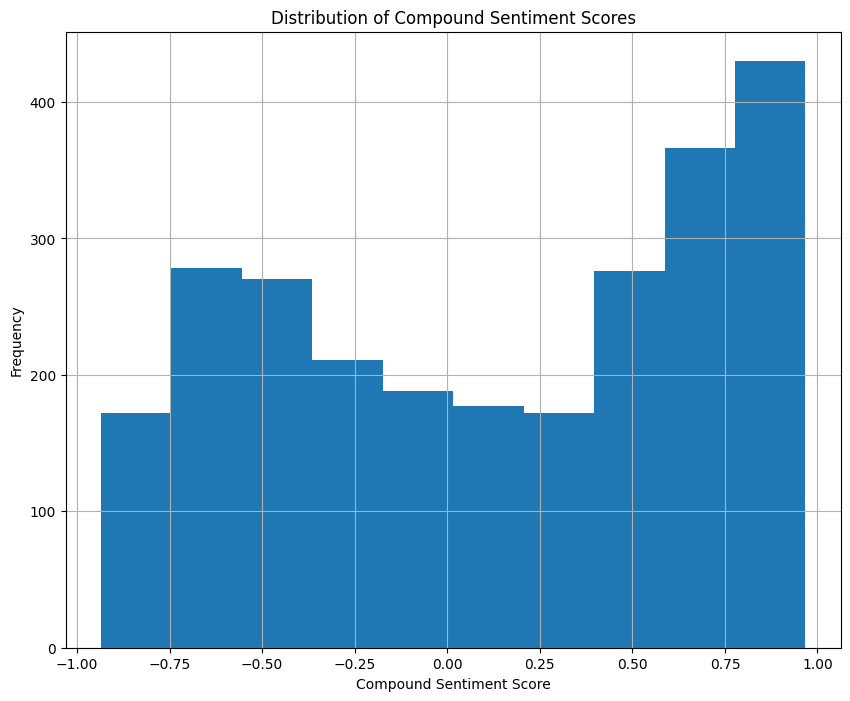

In [ ]:

  #analyzing and visualizing a dataset

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

#  Emotion and Sentiment Dataset into a Pandas DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/emotional_sentimental.json')

# Display basic information about the data
print("Data Information:")
print(data.info())

# View the first few rows of the data
print("\nFirst Few Rows:")
print(data.head())

# View the last few rows of the data
print("\nLast Few Rows:")
print(data.tail())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Calculate basic statistics for numerical columns
numerical_stats = data.describe()
print("\nNumerical Statistics:")
print(numerical_stats)

# Calculate the average message length for the 'text' column
data['message_length'] = data['text'].apply(lambda x: len(str(x)))
average_message_length = data['message_length'].mean()
print("\nAverage Message Length:")
print(average_message_length)

# Use VADER sentiment analysis tool from NLTK to analyze the sentiment of 'text' column
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for non-null and string entries
data['sentiment_scores'] = data['text'].apply(lambda x: analyzer.polarity_scores(x) if isinstance(x, str) else None)

# Extract compound sentiment score for non-null entries
data['compound_sentiment'] = data['sentiment_scores'].apply(lambda x: x['compound'] if x is not None else None)

# Print the first few rows with sentiment scores
print("\nSentiment Scores:")
print(data[['text', 'compound_sentiment']].head())

# Data visualization (e.g., histogram) for a specific numerical column
data['compound_sentiment'].hist(figsize=(10, 8))
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset as a DataFrame
data = pd.read_json('/content/drive/MyDrive/user_bot_data/help.json')

# Define a function to find a helpline
def find_helpline(user_request):
    # Search the dataset for relevant entries
    helpline_data = data[data['services'].apply(lambda services: 'helpline' in [service.lower() for service in services])]

    # Check if there are any helplines in the dataset
    if not helpline_data.empty:
        # You can provide information about the first helpline in the dataset
        helpline_info = helpline_data.iloc[0]

        # Extract relevant information
        helpline_name = helpline_info['name']
        helpline_location = helpline_info['location']
        helpline_contact = helpline_info['contact']
        helpline_website = helpline_info['website']

        response = f"Here's a helpline for you: {helpline_name}\nLocation: {helpline_location}\nContact: {helpline_contact}\nWebsite: {helpline_website}"
    else:
        response = "I'm sorry, but I couldn't find a helpline in the dataset."

    return response


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

#perform Word2Vec word embedding on user and chatbot sentences from a JSON dataset
# text into numerical vectors.
import json
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


with open('/content/drive/MyDrive/user_bot_data/data.json', 'r') as file:
    data = json.load(file)

# Extract user and chatbot sentences
user_sentences = [item['user'] for item in data]
chatbot_sentences = [item['chatbot'] for item in data]

# Tokenize the sentences
user_tokenized_data = [word_tokenize(sentence.lower()) for sentence in user_sentences]
chatbot_tokenized_data = [word_tokenize(sentence.lower()) for sentence in chatbot_sentences]

# Train a Word2Vec model on user and chatbot data
user_model = Word2Vec(user_tokenized_data, vector_size=100, window=5, min_count=1, sg=0)
chatbot_model = Word2Vec(chatbot_tokenized_data, vector_size=100, window=5, min_count=1, sg=0)




In [ ]:
# Check if user_model and chatbot_model exist
if 'user_model' in globals() and 'chatbot_model' in globals():
    print("Word2Vec models have been trained and loaded.")
else:
    print("Word2Vec models are not available. You need to train and load them first.")


Word2Vec models have been trained and loaded.


In [ ]:


# Function to convert a sentence to a vector using the Word2Vec model
def sentence_to_vector(model, sentence):
    words = word_tokenize(sentence.lower())
    vector = [model.wv[word] for word in words if word in model.wv]
    if vector:
        # Calculate the mean of word vectors to get a sentence vector
        sentence_vector = sum(vector) / len(vector)
        return sentence_vector
    else:
        # If no words in the sentence are in the model's vocabulary, return None
        return None

# Example usage:
user_sentence = "I'm feeling overwhelmed by the upcoming exams and the pressure to perform well."
chatbot_sentence = "Exam stress is common. Let's discuss study techniques and stress management."

user_vector = sentence_to_vector(user_model, user_sentence)
chatbot_vector = sentence_to_vector(chatbot_model, chatbot_sentence)

if user_vector is not None and chatbot_vector is not None:

    pass
else:

    print("Some words in the sentence are not in the model's vocabulary.")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity



# Calculate the cosine similarity between user and chatbot sentences
similarity = cosine_similarity([user_vector], [chatbot_vector])

# similarity is a value between -1 and 1, where higher values indicate greater similarity
print("Cosine Similarity:", similarity[0][0]) # prints the computed cosine similarity


Cosine Similarity: 0.36412475


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the user sentences
user_sentences_vectors = tfidf_vectorizer.fit_transform(user_sentences)#converts the user sentences into TF-IDF vectors

# Transform the user input
user_input_vector = tfidf_vectorizer.transform([user_input])


In [ ]:
import json
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data from the JSON file
with open('/content/drive/MyDrive/user_bot_data/data.json', 'r') as file:
    data = json.load(file)

# Extract user sentences and chatbot responses from the loaded data
user_sentences = [item['user'] for item in data]
chatbot_responses = [item['chatbot'] for item in data]

# Define a function to vectorize text using TF-IDF
def vectorize(text_list):
    tfidf_vectorizer = TfidfVectorizer()
    text_vectors = tfidf_vectorizer.fit_transform(text_list)
    return text_vectors, tfidf_vectorizer

# User input
user_input = "I'm stressed about my exams."

# Vectorize user input and user sentences using the same vectorizer
user_sentences_vectors, tfidf_vectorizer = vectorize(user_sentences)
user_input_vector = tfidf_vectorizer.transform([user_input])

# Initialize variables to keep track of the most similar response and its similarity score
most_similar_response = ""
max_similarity = -1  # Initialize with a negative value

# Calculate the cosine similarity between the user input vector and each chatbot response vector
for i in range(len(user_sentences)):
    similarity = cosine_similarity(user_input_vector, user_sentences_vectors[i])[0][0]
    if similarity > max_similarity:
        max_similarity = similarity
        most_similar_response = chatbot_responses[i]

# Provide the most similar response to the user
print("User input:", user_input)
print("Chatbot response:", most_similar_response)


User input: I'm stressed about my exams.
Chatbot response: It's understandable to feel anxious about exams. Let's discuss some study strategies to help you prepare.


In [ ]:

def get_most_similar_response(user_input):
    user_input_vector = tfidf_vectorizer.transform([user_input])

    max_similarity = -1  # Initialize with a negative value
    most_similar_response = ""

    for i in range(len(user_sentences)):
        similarity = cosine_similarity(user_input_vector, user_sentences_vectors[i])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_response = chatbot_responses[i]

    return most_similar_response

# Example user input
user_input = "I'm stressed about my exams."
chatbot_response = get_most_similar_response(user_input)
print("User input:", user_input)
print("Chatbot response:", chatbot_response)


User input: I'm stressed about my exams.
Chatbot response: It's understandable to feel anxious about exams. Let's discuss some study strategies to help you prepare.


In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the function to get the most similar response
def get_most_similar_response(user_input):
    user_input_vector = tfidf_vectorizer.transform([user_input])

    max_similarity = -1  # Initialize with a negative value
    most_similar_response = ""

    for i in range(len(user_sentences)):
        similarity = cosine_similarity(user_input_vector, user_sentences_vectors[i])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_response = chatbot_responses[i]

    return most_similar_response

# Define a function to find a helpline
def find_helpline(user_request):
    # Search the dataset for relevant entries
    helpline_data = data[data['services'].apply(lambda services: 'Helpline' in services)]

    # Check if there are any helplines in the dataset
    if not helpline_data.empty:
        # You can provide information about the first helpline in the dataset
        helpline_info = helpline_data.iloc[0]

        # Extract relevant information
        helpline_name = helpline_info['name']
        helpline_location = helpline_info['location']
        helpline_contact = helpline_info['contact']
        helpline_website = helpline_info['website']

        response = f"Here's a helpline for you: {helpline_name}\nLocation: {helpline_location}\nContact: {helpline_contact}\nWebsite: {helpline_website}"
    else:
        response = "I'm sorry, but I couldn't find a helpline in the dataset."

    return response

# Create a TF-IDF vectorizer and fit it to user sentences
tfidf_vectorizer = TfidfVectorizer()
user_sentences_vectors = tfidf_vectorizer.fit_transform(user_sentences)

# Start the chatbot interaction
print("Chatbot: Hello! How can I assist you today? (Type 'exit' to end the conversation)")

while True:
    # Receive user input
    user_input = input("User: ")

    if user_input.lower() == 'exit':
        print("Chatbot: Goodbye!")
        break

    if "helpline" in user_input.lower():
        # User asked for a helpline
        helpline_response = find_helpline(user_input)
        print("Chatbot:", helpline_response)
    else:
        # Get the most similar chatbot response
        chatbot_response = get_most_similar_response(user_input)
        print("Chatbot:", chatbot_response)

# End the chatbot interaction


Chatbot: Hello! How can I assist you today? (Type 'exit' to end the conversation)
User: It's been a tough day
Chatbot: Friendship conflicts can be hurtful. Let's discuss addressing this issue and finding resolution.
User: Can you recommend a good book to read
Chatbot: Engaging books can transport readers to magical worlds and leave them in awe of the storytelling.
User: I had a huge argument with my roommate
Chatbot: Roommate conflicts happen. Let's discuss conflict resolution and effective communication.
User: I got a low grade on my exam
Chatbot: Academic setbacks can be frustrating. Let's explore study strategies and self-compassion.
User: I'm angry with myself for not being more assertive
Chatbot: Assertiveness is important in the workplace. Let's explore ways to assert yourself confidently.
User: I'm angry with myself for not maintaining a healthy lifestyle
Chatbot: Healthy living can be a struggle. Let's explore strategies for maintaining a healthier lifestyle.
User: exit
Chatbot

In [ ]:
# Import necessary libraries
from dash import Dash, dcc, html, Input, Output, State
from dash.dependencies import Input, Output, State
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to get the most similar response
def get_most_similar_response(user_input):
    user_input_vector = tfidf_vectorizer.transform([user_input])

    max_similarity = -1  # Initialize with a negative value
    most_similar_response = ""

    for i in range(len(user_sentences)):
        similarity = cosine_similarity(user_input_vector, user_sentences_vectors[i])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_response = chatbot_responses[i]

    return most_similar_response

# Function to find a helpline
def find_helpline(user_request):
    helpline_data = data[data['services'].apply(lambda services: 'Helpline' in services)]

    if not helpline_data.empty:
        helpline_info = helpline_data.iloc[0]
        helpline_name = helpline_info['name']
        helpline_location = helpline_info['location']
        helpline_contact = helpline_info['contact']
        helpline_website = helpline_info['website']

        response = f"Here's a helpline for you: {helpline_name}\nLocation: {helpline_location}\nContact: {helpline_contact}\nWebsite: {helpline_website}"
    else:
        response = "I'm sorry, but I couldn't find a helpline in the dataset."

    return response

# Create a TF-IDF vectorizer and fit it to user sentences
tfidf_vectorizer = TfidfVectorizer()
user_sentences_vectors = tfidf_vectorizer.fit_transform(user_sentences)

# Create a Dash web application
app = Dash(__name__)

# Define the layout of the web application with an improved interface
app.layout = html.Div([
    html.Div([
        dcc.Store(id='chat-store', storage_type='memory'),
        dcc.Textarea(id='chat-history', value='', readOnly=True, style={'width': '100%', 'height': '300px'}),
        dcc.Input(id='user-input', type='text', value='', placeholder='Type your message...', style={'width': '80%'}),
        html.Button('Send', id='send-button', n_clicks=0, style={'width': '18%', 'margin-left': '2%'}),
    ], style={'width': '80%', 'margin': 'auto', 'padding': '20px', 'border': '1px solid #ccc', 'border-radius': '10px'}),

    # Add a section for images and loading indicators with improved styling
    html.Div([
        html.Img(src='your_image_url_here', style={'width': '80%', 'margin-top': '20px'}),
        dcc.Loading(id="loading", type="default", children=[]),
    ], style={'width': '80%', 'margin': 'auto', 'padding': '20px', 'border': '1px solid #ccc', 'border-radius': '10px'}),
])

# Define callback to update chat output
@app.callback(
    [Output('chat-history', 'value'),
     Output('chat-store', 'data')],
    [Input('send-button', 'n_clicks')],
    [State('user-input', 'value'),
     State('chat-store', 'data')]
)
def update_chat_history(n_clicks, user_input, chat_data):
    if user_input.lower() == 'exit':
        return "Chatbot: Goodbye!\n", chat_data

    if not chat_data:
        chat_data = {'history': []}

    if "helpline" in user_input.lower():
        helpline_response = find_helpline(user_input)
        chat_data['history'].append(f"User: {user_input}\nChatbot: {helpline_response}\n")
    else:
        chatbot_response = get_most_similar_response(user_input)
        chat_data['history'].append(f"User: {user_input}\nChatbot: {chatbot_response}\n")

    return ''.join(chat_data['history']), chat_data

# Run the web application
if __name__ == '__main__':
    app.run_server(port=8050, debug=True)


<IPython.core.display.Javascript object>